<a href="https://colab.research.google.com/github/apriandito/simple-sma/blob/main/Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Huggingface Transformers
! pip install  huggingface transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.3 MB/s eta 0:00:00


In [ ]:
# Load Data
df = pd.read_csv("https://raw.githubusercontent.com/apriandito/simple-sma/main/tweet-gojek.csv")
df[["username","text"]]

In [ ]:
# Load Packages
import pandas as pd
import seaborn as sns


# Load Modules
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# Download Pretrained Model
pretrained= "mdhugol/indonesia-bert-sentiment-classification"

# Set Model and Tokenizer
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

# Create sentiment classifier using huggingface pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [ ]:
# Get sentiment label for each row in dataframe
df['sentiment'] = df['text'].apply(lambda x: sentiment_analysis(x)[0]['label'])

In [ ]:
# Set Label
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

# Replace the values in the sentiment column
df['sentiment'] = df['sentiment'].replace(label_index)

# Show Tweet with sentiment
df[["username","text", "sentiment"]]

,username,text,sentiment
0,@cindyatikaa,Padahal tarif gojek dkk itu potongannya besar,negative
1,@moshmoshiy,Mending harga pasti aja deh. Orang ke gojek it...,negative
2,@jujuanthem,gojek knp error mulu dah mau pake voucher aja ...,negative
3,@jjvalsen,gue yang tiap naik gojek pake voucher tapi jar...,negative
4,@livelovekuroo,gojek spicy chicken ga ya LAGI PENGEN BGT DEMI...,positive
...,...,...,...
1038,@vosquampulchra,nangis waktu naik gojek,negative
1039,@venusrkive,"jalan yg sebrang fkik itu, disitu banyak abang...",neutral
1040,@14kdlr,aku gojek! grab kadang suka... gajelas.. drive...,negative
1041,@heeycollection,aku mau pesen gojek pulang kagak jadi2 dahh wk...,negative


<Axes: xlabel='sentiment', ylabel='count'>

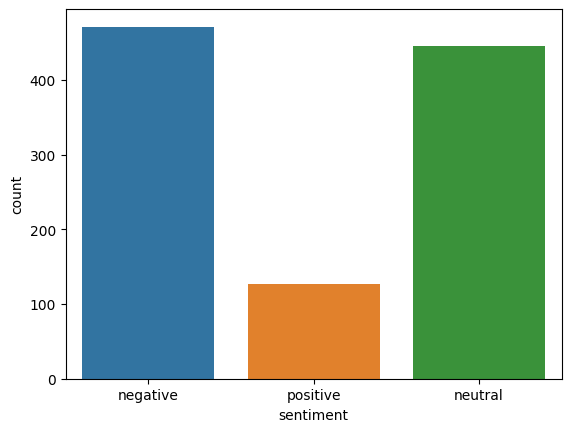

In [ ]:
# Visualise the sentiment distribution
sns.countplot(x ='sentiment', data = df)